This notebook has been created by Aryan Sharma, a B.Tech student at VIT.

I'm passionate about exploring Deep Learning and this notebook showcases my implementation of a Convolutional Neural Network model for the classic CIFAR-10 classification task. CIFAR-10 is a popular dataset of images used to train machine learning algorithms, especially for image recognition. It has 60,000 small (32x32 pixels) color images from 10 classes, like airplanes, cars, and animals. Because it's small and well-organized, it's a good choice for researchers to test and compare their algorithms.

<br>
Libraries Used:

Keras (keras.datasets, keras.utils) for data loading and manipulation.<br>
TensorFlow 2.x (tensorflow.keras.layers) for building the neural network model.
NumPy (numpy) for numerical computations.<br>
Matplotlib (matplotlib.pyplot) for data visualization.<br>
Scikit-learn (sklearn.metrics) for confusion matrix generation.<br>
Seaborn (seaborn) for enhanced confusion matrix visualization.

<br>
Here's a quick overview of the code in the notebook:

1. We'll begin by loading the CIFAR-10 dataset using Keras, containing 60,000 of labelled images of the 10 classes, split into train and test data.<br>
2. To prepare the data for our model, we'll normalize the pixel values, and utilize libraries like PIL for any additional image processing if needed (reshaping isn't required here).<br>
3. We will define and construct a Convolutional Neural Network architecture suitable for image classification using TensorFlow the architecture will contain two layers of CONV -> POOL -> NORMALISATION followed by two dense layers.<br>
4. We'll train the model on the training data, adjusting its parameters to improve its ability to recognize digits.<br>
5. After training, we assess its accuracy and loss over epochs and plot that information using Matplotlib.<br>
6. In the end, we evaluate the model on the test set, and will evaluate its performance and plot a confusion matrix for it using Scikit-learn and Seaborn.

<br>
Feel free to use this code and mess around with it!

In [1]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
print("Finished importing required Libraries")

Finished importing required Libraries


In [3]:
# Loading the dataset from keras
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# Checking the shape of the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
# Normalising the data
X_train = (X_train).astype('float64') / 255.0
y_train = to_categorical(y_train)
X_test = (X_test).astype('float64') / 255.0
y_test = to_categorical(y_test)

In [6]:
# Defining the architecture of the model
def build_model():
  model = Sequential()
  model.add(Input(shape = (32, 32, 3)))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization(axis=3))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization(axis=3))
  model.add(Flatten())
  model.add(Dropout(0.3))
  model.add(Dense(20, activation = 'relu'))
  model.add(Dropout(0.4))
  model.add(Dense(10, activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
  return model;

In [7]:
# Builiding and training the model on the training data 
model = build_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2699 - loss: 2.1490 - val_accuracy: 0.4216 - val_loss: 1.7461
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4285 - loss: 1.5661 - val_accuracy: 0.5045 - val_loss: 1.3738
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4844 - loss: 1.4215 - val_accuracy: 0.5786 - val_loss: 1.1914
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5161 - loss: 1.3329 - val_accuracy: 0.5625 - val_loss: 1.2602
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5314 - loss: 1.2738 - val_accuracy: 0.5505 - val_loss: 1.2595
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5433 - loss: 1.2536 - val_accuracy: 0.6111 - val_loss: 1.1104
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5642 - loss: 1.1909 - val_accuracy: 0.5890 - val_loss: 1.2057
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5700 - loss: 1.1866 - val_accu

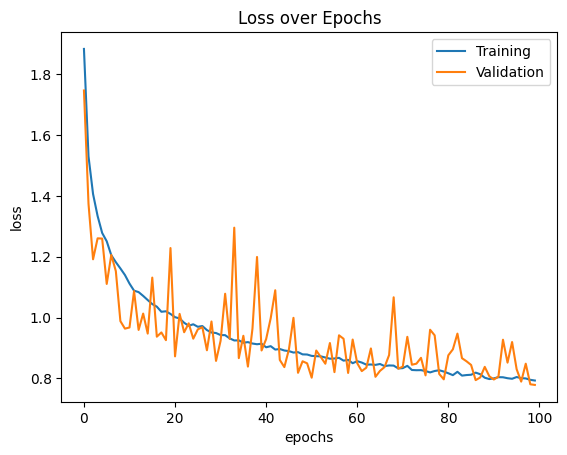

Text(0, 0.5, 'loss')

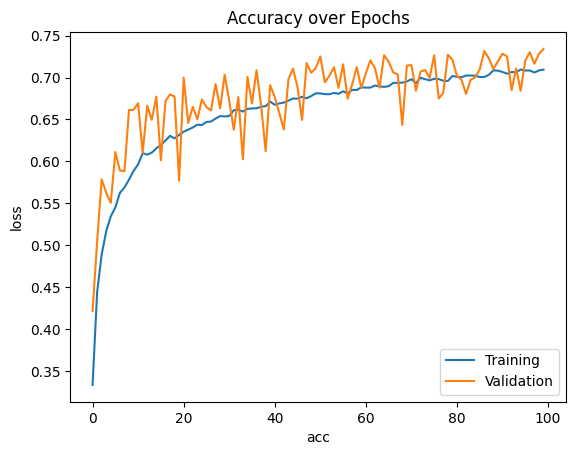

In [10]:
# Plotting the accuracy and loss metrics over epochs 
loss = history["loss"]
val_loss = history["val_loss"]
accuracy = history["accuracy"]
val_accuracy = history["val_accuracy"]

plt.plot(loss, label = "Training")
plt.plot(val_loss, label = "Validation")
plt.title("Loss over Epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.plot(accuracy, label = "Training")
plt.plot(val_accuracy, label = "Validation")
plt.title("Accuracy over Epochs")
plt.legend()
plt.xlabel("acc")
plt.ylabel("loss")

In [11]:
# Evaluating the model on test data set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}\nTest Accuracy: {test_acc:.4f}")

Test Loss: 0.7759
Test Accuracy: 0.7377


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


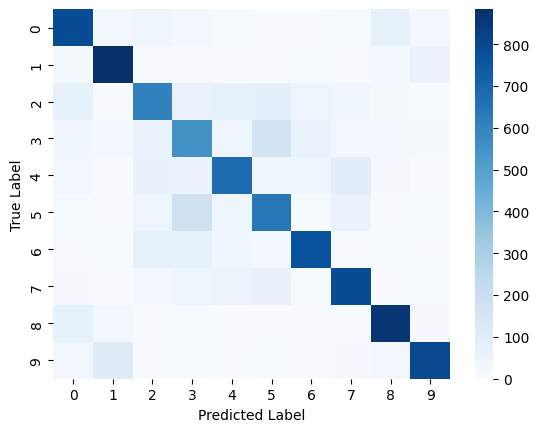

In [12]:
# Creating the confusion matrix for the test data set
y_pred = model.predict(X_test);
y_pred_label = np.argmax(y_pred, axis=1)
y_true_label = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_label, y_pred_label)
sns.heatmap(cm, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The model got a accuracy of 73% which although is very low compared to the current state of the art architectures out there but is still fine given the simplicit